In [2]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/zerobase/MyPJ/PJ19')
os.getcwd()

'/content/drive/MyDrive/zerobase/MyPJ/PJ19'

In [4]:
import pandas as pd
df = pd.read_csv('P_PJT19_DATA.csv')
df.head(10)

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19
1,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:18
2,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07
3,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:03
4,User 4,AE,Device 0,0,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23
5,User 4,AE,Device 0,0,the gray,The Gray Man,select,title_results,2022-07-17 13:59:17
6,User 4,AE,Device 0,0,NaN,"Stranger Things 4: ""Chapter Nine: The Piggyback""",play,prequery_results,2022-07-01 17:39:31
7,User 4,AE,Device 0,0,NaN,"Stranger Things 4: ""Chapter Eight: Papa""",play,prequery_results,2022-07-01 17:16:37
8,User 4,AE,Device 0,0,NaN,"Stranger Things 4: ""Chapter Eight: Papa""",play,prequery_results,2022-07-01 17:15:22
9,User 4,AE,Device 0,0,NaN,"Stranger Things 4: ""Chapter Eight: Papa""",play,prequery_results,2022-07-01 17:04:54


## Data Preprocessing  
---
Checking the basic properties of the collected dataset
* Check the data shape (number of rows and columns)

* Check data types of each column

* Identify any missing (null) values

* Check the unique values in each column

* Convert columns to datetime type if needed

In [5]:
# 9 columns and 2616 rows
df.shape

(2616, 9)

In [10]:
# only 'Query Typed' and 'Displayed Name' columns have null values
# only 'Is Kids' column has numeric values
# 'Utc Timestamp' column is not datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Profile Name      2616 non-null   object
 1   Country Iso Code  2616 non-null   object
 2   Device            2616 non-null   object
 3   Is Kids           2616 non-null   int64 
 4   Query Typed       1889 non-null   object
 5   Displayed Name    1798 non-null   object
 6   Action            2616 non-null   object
 7   Section           2616 non-null   object
 8   Utc Timestamp     2616 non-null   object
dtypes: int64(1), object(8)
memory usage: 184.1+ KB


In [9]:
df.isnull().sum()

,0
Profile Name,0
Country Iso Code,0
Device,0
Is Kids,0
Query Typed,727
Displayed Name,818
Action,0
Section,0
Utc Timestamp,0


---
[Analysis of Unique Values in Categorical Variables]

In [12]:
df.columns

Index(['Profile Name', 'Country Iso Code', 'Device', 'Is Kids', 'Query Typed',
       'Displayed Name', 'Action', 'Section', 'Utc Timestamp'],
      dtype='object')

In [13]:
df['Profile Name'].unique()

array(['User 4', 'User 2', 'User 3', 'User 0', 'User 1', 'User 7',
       'User 6', 'User 5', 'User 8'], dtype=object)

In [14]:
df_unique=df[['Profile Name', 'Country Iso Code', 'Device', 'Is Kids', 'Action', 'Section']]
df_unique.head(2)

,Profile Name,Country Iso Code,Device,Is Kids,Action,Section
0,User 4,AE,Device 0,0,play,prequery_results
1,User 4,AE,Device 0,0,select,prequery_results


In [15]:
# Aggregate the DataFrame to collect unique values in each column and convert them to strings
unique_values_df = df_unique.agg(lambda x: ', '.join(sorted(x.astype(str).unique()))).to_frame().reset_index()

# Rename the columns for clarity
unique_values_df.columns = ['Column Name', 'Unique Values']

# Set pandas to display the full content of each column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Profile Name,"User 0, User 1, User 2, User 3, User 4, User 5, User 6, User 7, User 8"
1,Country Iso Code,"AE, CA, CR, FR, IN"
2,Device,"Device 0, Device 1, Device 2, Device 3, Device 4, Device 5"
3,Is Kids,0
4,Action,"add, play, select"
5,Section,"prequery_results, suggestion_results, title_results"


---
[Datetime Conversion]

In [16]:
df['Utc Timestamp'] = pd.to_datetime(df['Utc Timestamp'])

In [17]:
# Utc Timestamp: 21/11/26 ~ 23/06/17 (approximately 1.5 years)
df['Utc Timestamp'].sort_values()

,Utc Timestamp
712,2021-11-26 09:31:39
711,2021-11-26 09:31:42
710,2021-11-26 09:31:43
709,2021-12-01 15:51:09
708,2021-12-01 15:51:17
...,...
825,2023-06-17 16:04:31
824,2023-06-17 16:05:38
823,2023-06-17 16:09:00
822,2023-06-17 16:09:10


---
[Analysis of the Causes of Null Values]

In [18]:
df.isnull().sum()

,0
Profile Name,0
Country Iso Code,0
Device,0
Is Kids,0
Query Typed,727
Displayed Name,818
Action,0
Section,0
Utc Timestamp,0


In [19]:
df.columns

Index(['Profile Name', 'Country Iso Code', 'Device', 'Is Kids', 'Query Typed',
       'Displayed Name', 'Action', 'Section', 'Utc Timestamp'],
      dtype='object')

In [20]:
query_null = df[df['Query Typed'].isnull()]
query_section = query_null[['Query Typed', 'Section']].drop_duplicates()
query_section

,Query Typed,Section
0,NaN,prequery_results
1196,NaN,suggestion_results
1380,NaN,title_results


In [21]:
display_null = df[df['Displayed Name'].isnull()]
display_section = display_null[['Displayed Name', 'Section']].drop_duplicates()
display_section

,Displayed Name,Section
1,NaN,prequery_results
14,NaN,title_results
939,NaN,suggestion_results


In [22]:
query_display_null = df[df['Query Typed'].isnull() & df['Displayed Name'].isnull()]
query_display_section = query_display_null[['Query Typed', 'Displayed Name', 'Section']].drop_duplicates()
query_display_section

,Query Typed,Displayed Name,Section
1,NaN,NaN,prequery_results
1198,NaN,NaN,suggestion_results
1380,NaN,NaN,title_results


---
[Data Cleaning Based on the Definition of the 'Section' Column]

In [23]:
# 2616 -> 2574
df_filtered_1 = df[~((df['Query Typed'].isnull()) & (df['Section'].isin(['suggestion_results','title_results'])))]
len(df_filtered_1)

2574

In [24]:
df_ft=df_filtered_1[~((df['Displayed Name'].isnull()) & (df['Section'].isin(['suggestion_results'])))]
len(df_ft)

2566

In [25]:
query_display_null = df_ft[df['Query Typed'].isnull() & df['Displayed Name'].isnull()]
query_display_section = query_display_null[['Query Typed', 'Displayed Name', 'Section']].drop_duplicates()
query_display_section

,Query Typed,Displayed Name,Section
1,NaN,NaN,prequery_results


In [26]:
query_notnull_display_null = df_ft[~df['Query Typed'].isnull() & df['Displayed Name'].isnull()]
display_section = query_notnull_display_null[['Displayed Name', 'Section']].drop_duplicates()
display_section

,Displayed Name,Section
14,NaN,title_results


In [27]:
query_notnull_display_null['Query Typed'].isnull().sum()

np.int64(0)

In [28]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2566 entries, 0 to 2615
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Profile Name      2566 non-null   object        
 1   Country Iso Code  2566 non-null   object        
 2   Device            2566 non-null   object        
 3   Is Kids           2566 non-null   int64         
 4   Query Typed       1881 non-null   object        
 5   Displayed Name    1775 non-null   object        
 6   Action            2566 non-null   object        
 7   Section           2566 non-null   object        
 8   Utc Timestamp     2566 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 200.5+ KB


In [29]:
df_ft.isnull().sum()

,0
Profile Name,0
Country Iso Code,0
Device,0
Is Kids,0
Query Typed,685
Displayed Name,791
Action,0
Section,0
Utc Timestamp,0


✅ Extracted df_ft, a DataFrame containing only contextually valid null values

---
[Renamed the DataFrame for convenience]

In [30]:
df_origin=df

In [31]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Profile Name      2616 non-null   object        
 1   Country Iso Code  2616 non-null   object        
 2   Device            2616 non-null   object        
 3   Is Kids           2616 non-null   int64         
 4   Query Typed       1889 non-null   object        
 5   Displayed Name    1798 non-null   object        
 6   Action            2616 non-null   object        
 7   Section           2616 non-null   object        
 8   Utc Timestamp     2616 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 184.1+ KB


In [32]:
df=df_ft

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2566 entries, 0 to 2615
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Profile Name      2566 non-null   object        
 1   Country Iso Code  2566 non-null   object        
 2   Device            2566 non-null   object        
 3   Is Kids           2566 non-null   int64         
 4   Query Typed       1881 non-null   object        
 5   Displayed Name    1775 non-null   object        
 6   Action            2566 non-null   object        
 7   Section           2566 non-null   object        
 8   Utc Timestamp     2566 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 200.5+ KB


## Data Visualization and Insight Generation
---

[Action Counts by Country]

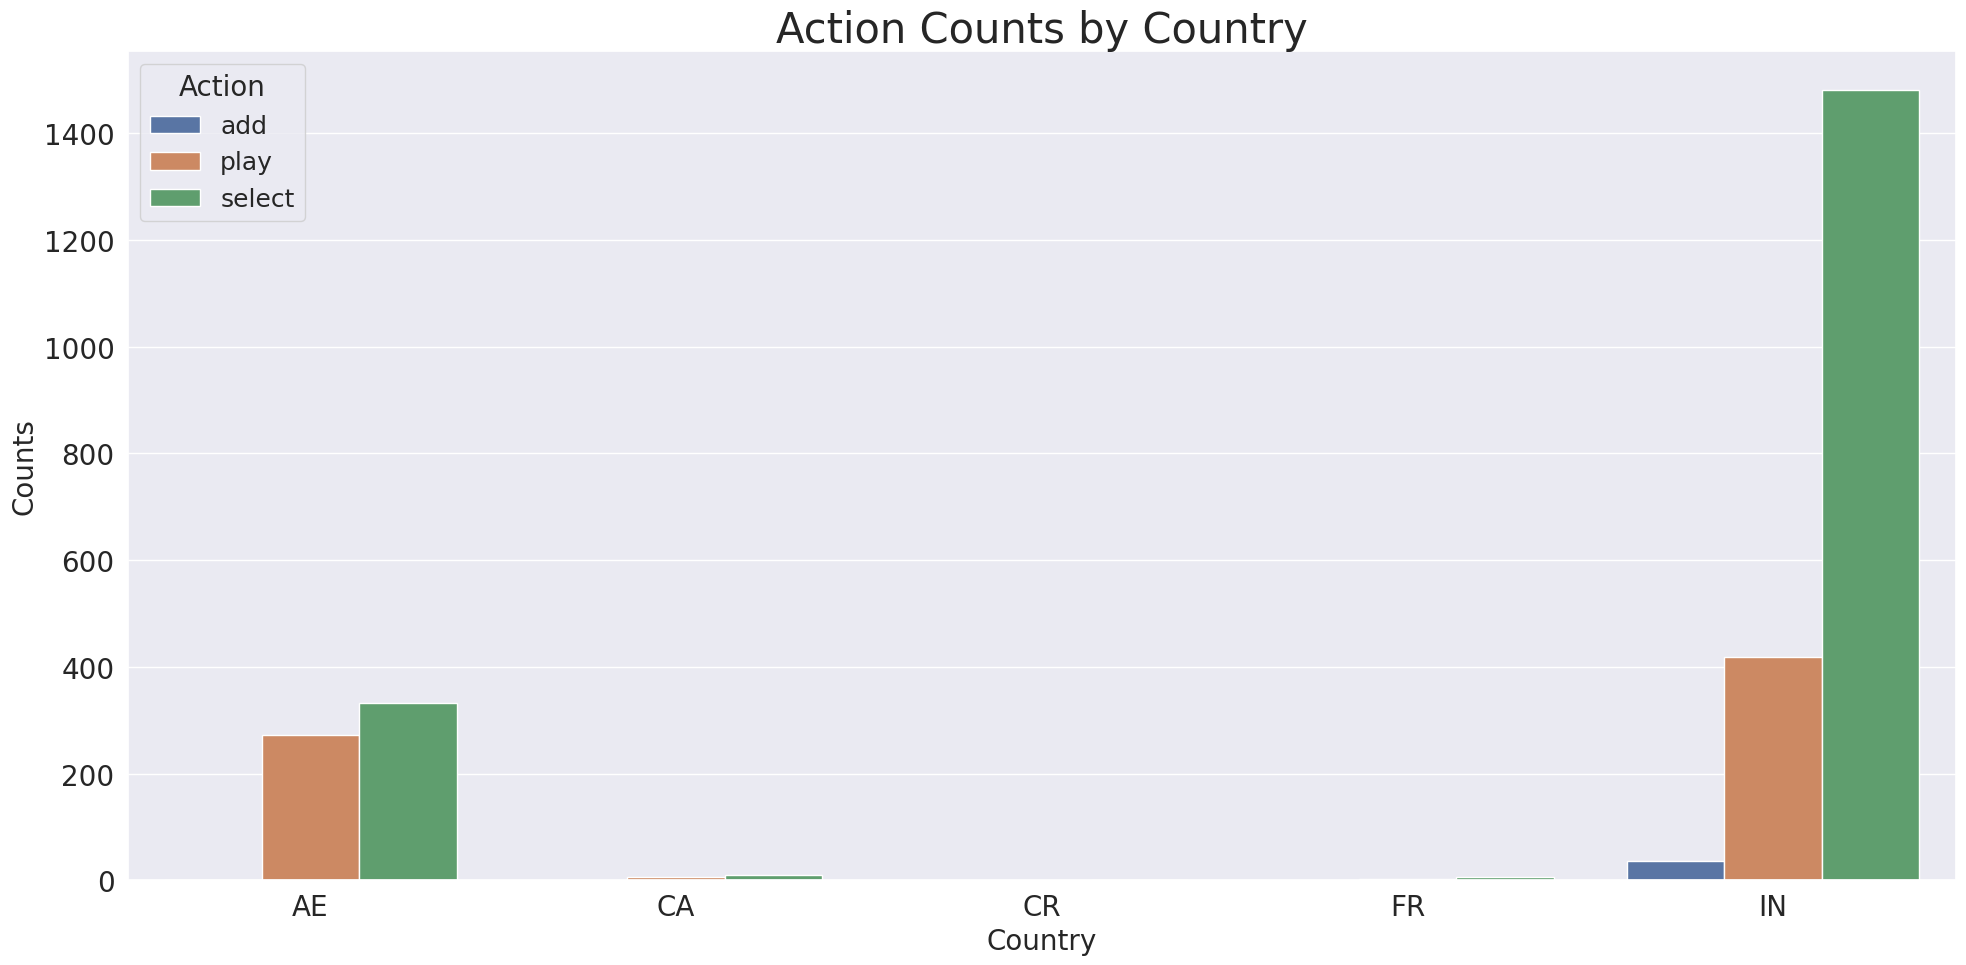

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'Country Iso Code' and 'Action', then counting the occurrences
grouped_data = df.groupby(['Country Iso Code', 'Action']).size().reset_index(name='Counts')

# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=grouped_data, x='Country Iso Code', y='Counts', hue='Action')

plt.title('Action Counts by Country', fontsize=30)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

# Increasing the legend font size
plt.legend(title='Action', fontsize='18', title_fontsize='20')

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

✅ India has the largest volume of data, followed by the United Arab Emirates.\
✅ In India, the gap between the number of 'play' and 'select' actions is notably large, whereas such a difference is not observed in the UAE.

---
[Action Counts by Device Type]

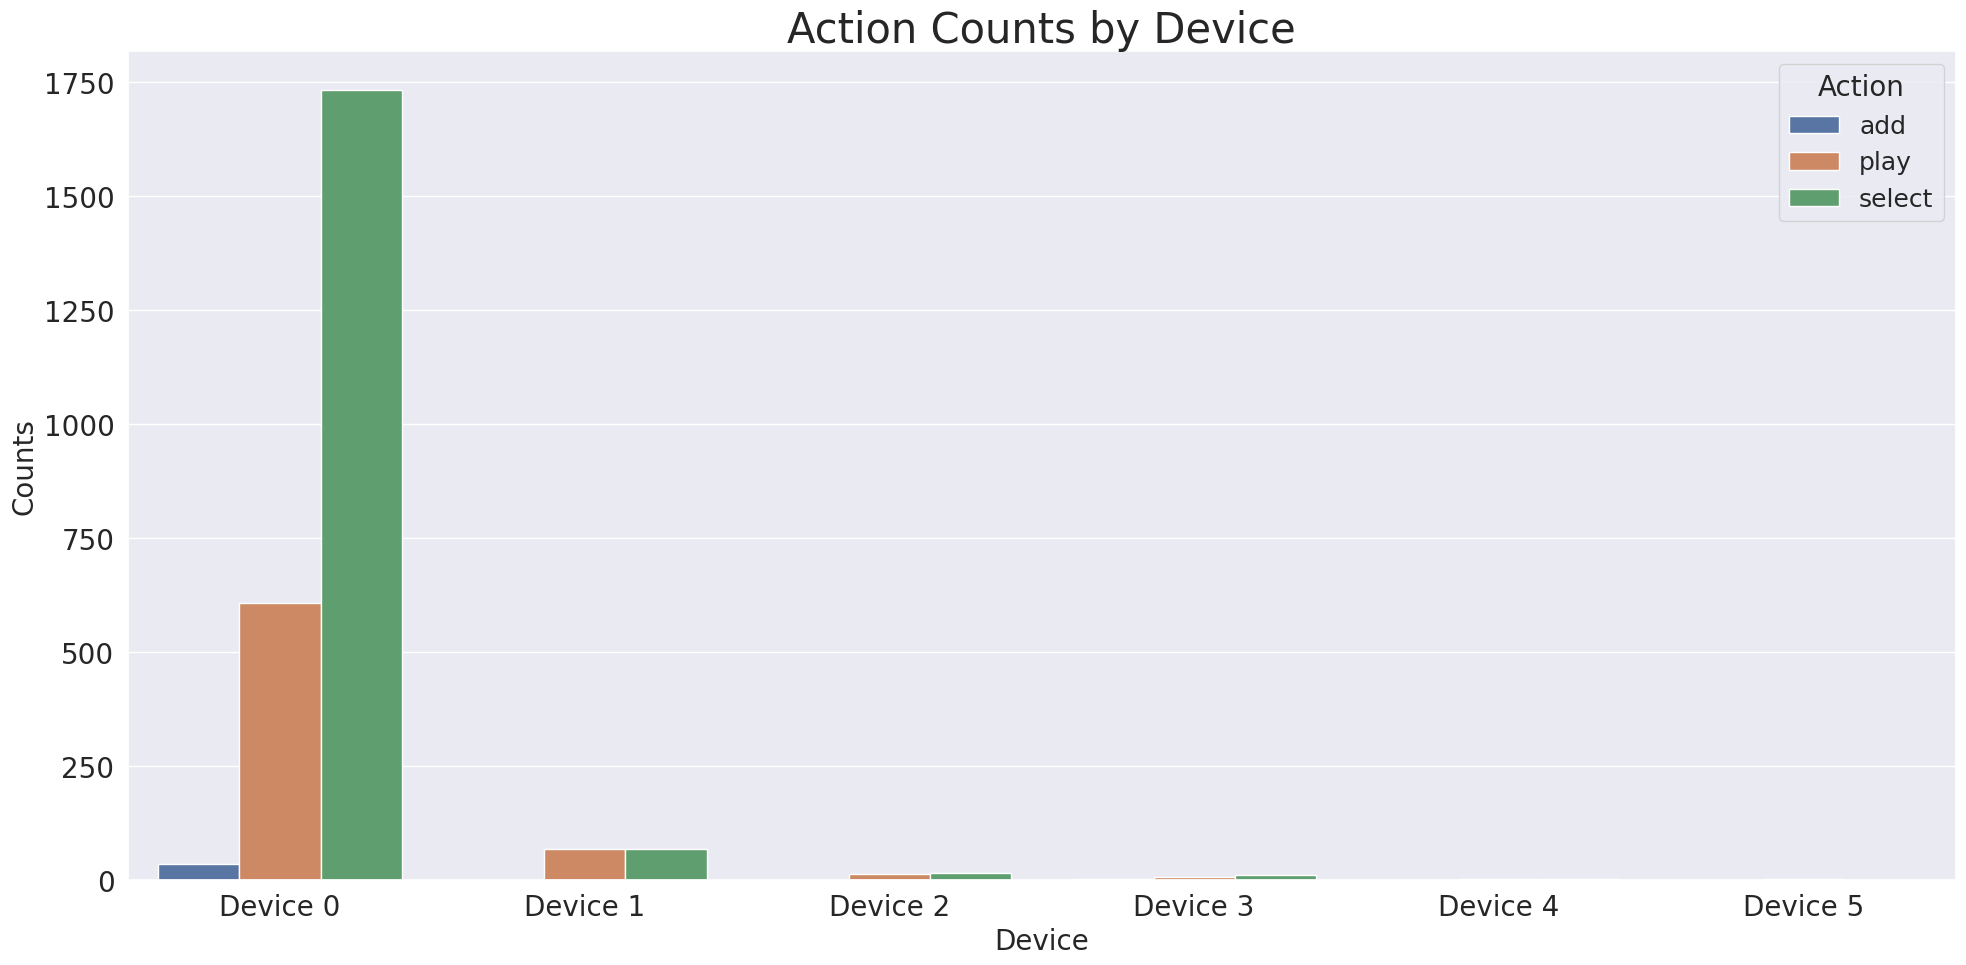

In [35]:
# Grouping the data by 'Country Iso Code' and 'Action', then counting the occurrences
grouped_data = df.groupby(['Device', 'Action']).size().reset_index(name='Counts')

# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=grouped_data, x='Device', y='Counts', hue='Action')

plt.title('Action Counts by Device', fontsize=30)
plt.xlabel('Device', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

# Increasing the legend font size
plt.legend(title='Action', fontsize='18', title_fontsize='20')

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

✅ Most of the data was collected from Device 0, suggesting that device-level analysis may not be meaningful.

---
[User Engagement by Country and Result Generation Method]

<Figure size 2000x1000 with 0 Axes>

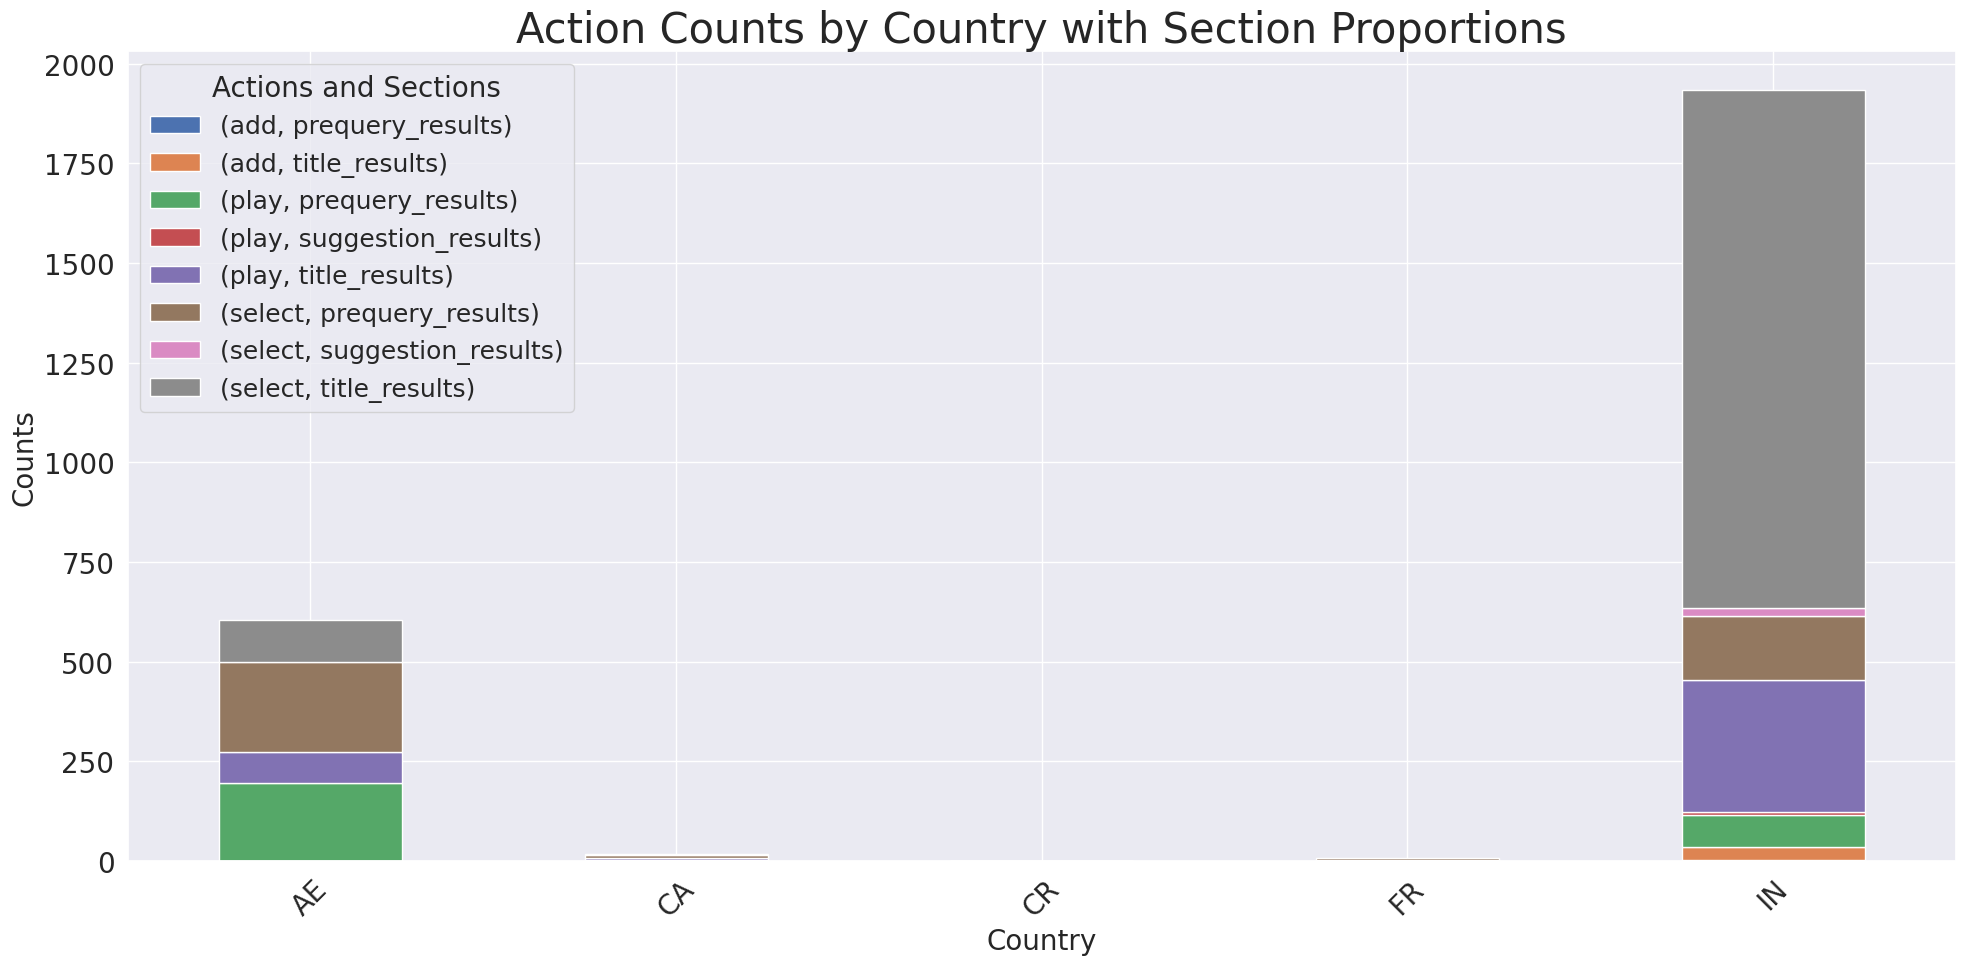

In [36]:
# Grouping the data by 'Country Iso Code', 'Action', and 'Section', then counting the occurrences
grouped_data = df.groupby(['Country Iso Code', 'Action', 'Section']).size().reset_index(name='Counts')

# Creating a pivot table with 'Country Iso Code' as index, the columns as 'Action', and the cells as the sum of 'Counts'
# This pivot table is multi-level because we have multiple 'Sections' for each 'Action'
pivot_data = grouped_data.pivot_table(index='Country Iso Code', columns=['Action', 'Section'], values='Counts', fill_value=0)

# Plotting the stacked bar plot
plt.figure(figsize=(20, 10))
pivot_data.plot(kind='bar', stacked=True, figsize=(20, 10))

# Customize the plot with titles and labels
plt.title('Action Counts by Country with Section Proportions', fontsize=30)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20, rotation=45)  # Rotate the x-tick labels for better readability
plt.yticks(fontsize=20)
plt.legend(title='Actions and Sections', fontsize=18, title_fontsize=20)
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
# Grouping the data by 'Country Iso Code', 'Action', and 'Section', then counting the occurrences
grouped_data = df.groupby(['Country Iso Code', 'Action', 'Section']).size().reset_index(name='Counts')

# Creating a pivot table with 'Country Iso Code' as index, the columns as 'Action', and the cells as the sum of 'Counts'
# This pivot table is multi-level because we have multiple 'Sections' for each 'Action'
pivot_data = grouped_data.pivot_table(index='Country Iso Code', columns=['Action', 'Section'], values='Counts', fill_value=0)
pivot_data

Action                        add                           play  \
Section          prequery_results title_results prequery_results   
Country Iso Code                                                   
AE                            0.0           1.0            195.0   
CA                            0.0           0.0              4.0   
CR                            0.0           0.0              0.0   
FR                            0.0           0.0              2.0   
IN                            2.0          34.0             80.0   

Action                                                      select  \
Section          suggestion_results title_results prequery_results   
Country Iso Code                                                     
AE                              0.0          77.0            227.0   
CA                              0.0           3.0              8.0   
CR                              0.0           0.0              1.0   
FR                              0.0           0.0              6.0   
IN                              8.0         331.0            160.0   

Action                                             
Section          suggestion_results title_results  
Country Iso Code                                   
AE                              0.0         105.0  
CA                              0.0           2.0  
CR                              0.0           0.0  
FR                              0.0           0.0  
IN                             21.0        1299.0

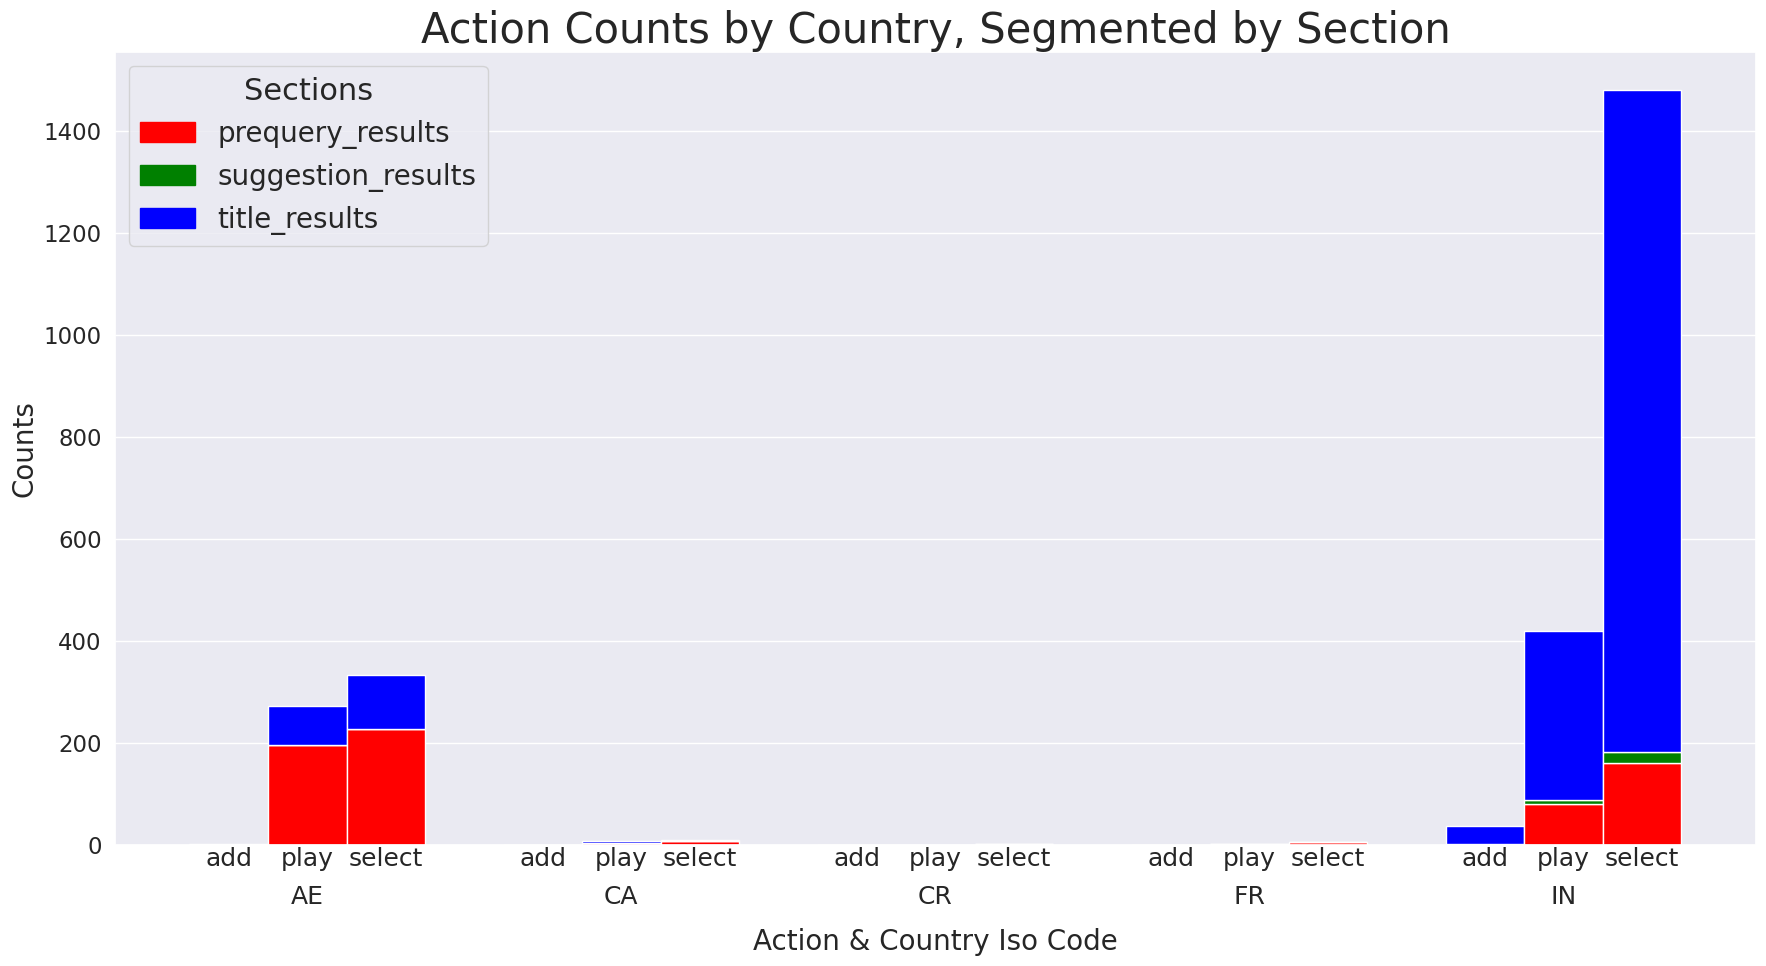

In [39]:
import numpy as np
from matplotlib.patches import Patch

# Assuming pivot_data is your DataFrame after creating the pivot table

# Set the color for each section
colors = {'prequery_results': 'red', 'suggestion_results': 'green', 'title_results': 'blue'}

# Initialize the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Define the width of the bars
bar_width = 0.25

# Define the position of the bars
positions = np.arange(len(pivot_data))

# Plot each bar
for i, action in enumerate(['add', 'play', 'select']):
    # Calculate the bottom position of each stack
    bottoms = np.zeros(len(pivot_data))

    for section in ['prequery_results', 'suggestion_results', 'title_results']:
        # Check if the section exists for the action
        if (action, section) in pivot_data.columns:
            ax.bar(positions + i*bar_width, pivot_data[(action, section)],
                   bar_width, bottom=bottoms, color=colors[section], label=section if i == 0 else "")
            bottoms += pivot_data[(action, section)].fillna(0).values

# Set the action labels above each country name
for pos, country in enumerate(pivot_data.index):
    ax.text(pos + 0*bar_width, -5, 'add', ha='center', va='top', rotation=0)
    ax.text(pos + bar_width, -5, 'play', ha='center', va='top', rotation=0)
    ax.text(pos + 2*bar_width, -5, 'select', ha='center', va='top', rotation=0)

# Add country names below the action labels with adjusted y-position
for pos, country in enumerate(pivot_data.index):
    ax.text(pos + bar_width, -80, country, ha='center', va='top')  # Adjust -10 if needed

# Set the position and labels for the X-axis
# ax.set_xticks(positions + bar_width)
# ax.set_xticklabels(pivot_data.index)

# Remove old x-tick labels as we have manually added them
ax.set_xticks([])

# Optionally, if you want to have the tick lines (without labels), you could add them back in:
# ax.tick_params(axis='x', which='both', length=0)  # Set length to 0 to hide tick marks

# Adding labels and title

ax.set_xlabel('Action & Country Iso Code',labelpad=60,fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Action Counts by Country, Segmented by Section', fontsize=30)

# Adjust the subplot parameters to give more space at the bottom
plt.subplots_adjust(bottom=0.2)

# Create legend patches
legend_patches = [Patch(color=color, label=label) for label, color in colors.items()]
# Add legend to the plot
ax.legend(handles=legend_patches, title='Sections',fontsize=20,title_fontsize=22)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
len(pivot_data)

5

In [41]:
positions = np.arange(len(pivot_data))
positions

array([0, 1, 2, 3, 4])

In [43]:
bottoms = np.zeros(len(pivot_data))
bottoms

array([0., 0., 0., 0., 0.])

---
[User Engagement by Result Generation Method]

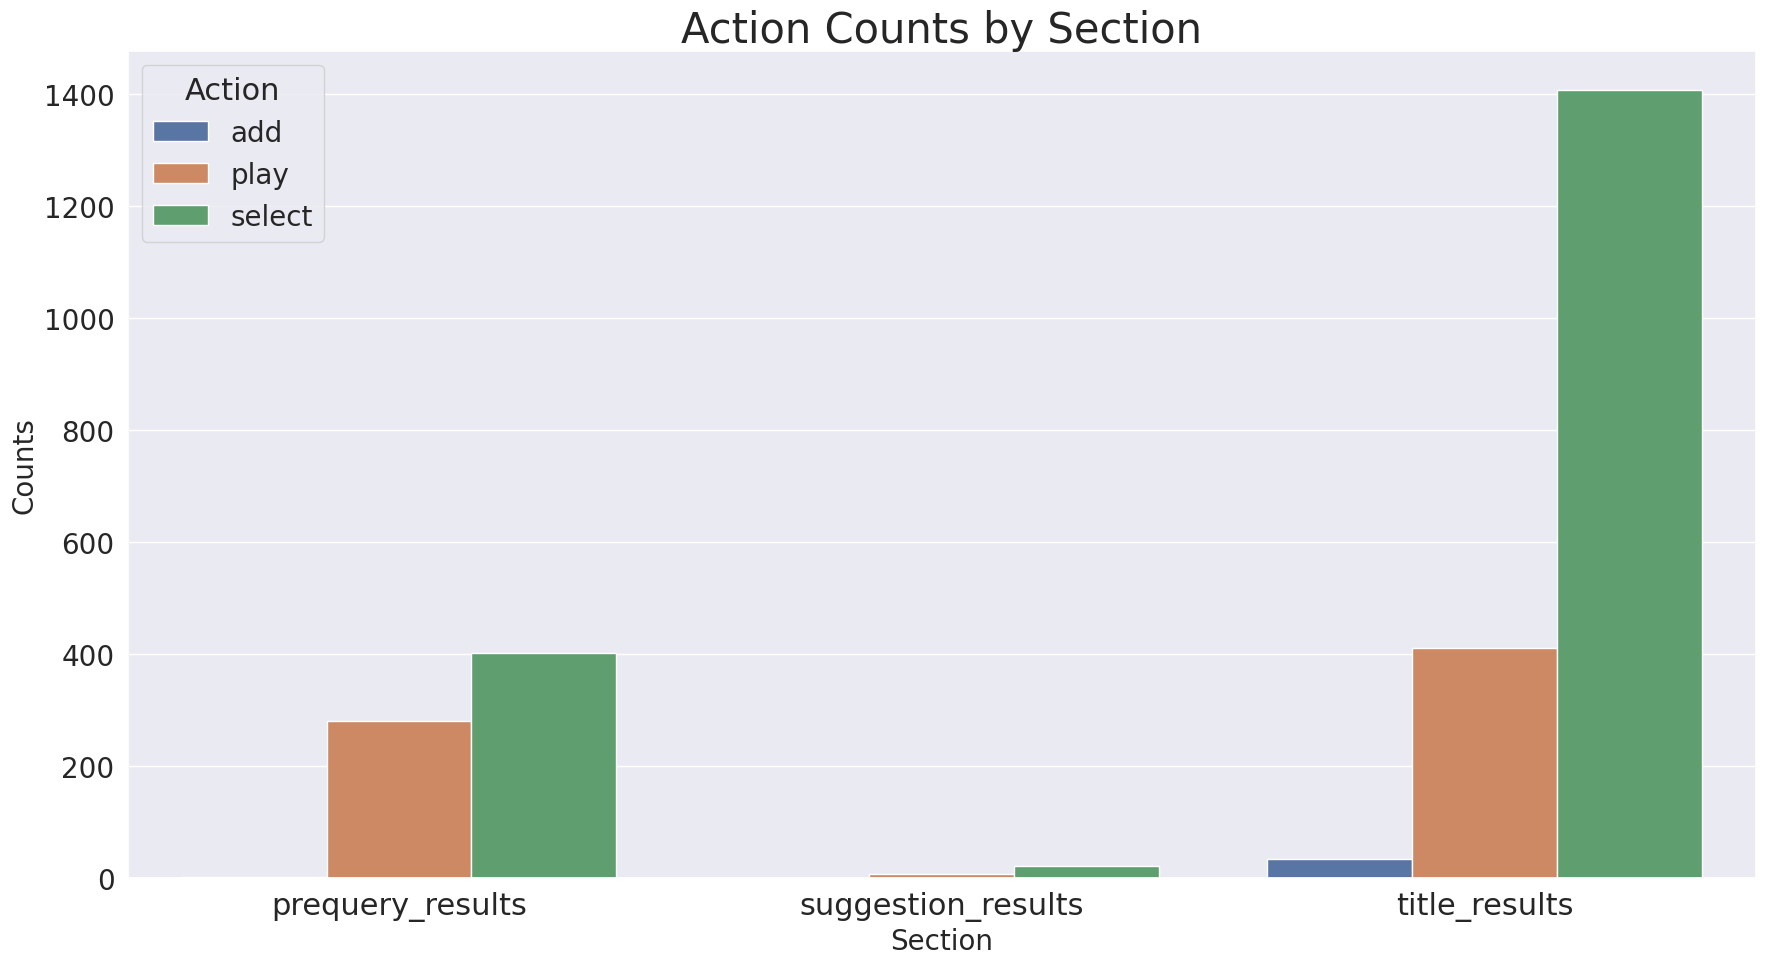

In [44]:
# Grouping the data by 'Country Iso Code' and 'Action', then counting the occurrences
grouped_data = df.groupby(['Section', 'Action']).size().reset_index(name='Counts')

# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(18, 10))
sns.barplot(data=grouped_data, x='Section', y='Counts', hue='Action')

plt.title('Action Counts by Section', fontsize=30)
plt.xlabel('Section', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=22)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

# Increasing the legend font size
plt.legend(title='Action', fontsize='20', title_fontsize='22')

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

---
[Analysis of Interaction Differences in Suggested Searches Based on Similarity Between Input Queries and Suggested Keywords]

In [45]:
len(df[df['Section']=='suggestion_results'])

29

In [46]:
df_suggest=df[df['Section']=='suggestion_results']
df_suggest.head(3)

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
933,User 7,IN,Device 1,0,h,Ouija: Origin of Evil,play,suggestion_results,2023-04-20 12:06:51
934,User 7,IN,Device 1,0,h,Ouija: Origin of Evil,select,suggestion_results,2023-04-20 12:06:33
935,User 7,IN,Device 1,0,h,Annabelle: Creation,play,suggestion_results,2023-04-20 12:05:06


In [48]:
# Ensure strings and strip whitespace
df_suggest['Query Typed'] = df_suggest['Query Typed'].astype(str).str.strip().str.lower()
df_suggest['Displayed Name'] = df_suggest['Displayed Name'].astype(str).str.strip().str.lower()

# Filter rows where 'Query Typed' is a substring of 'Displayed Name'
filtered_df = df_suggest[df_suggest.apply(lambda x: x['Query Typed'] in x['Displayed Name'], axis=1)]

# Display the first few rows of the resulting DataFrame
filtered_df.head()

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
1011,User 7,IN,Device 0,0,tw,the twilight,select,suggestion_results,2023-02-18 17:35:00
1369,User 5,IN,Device 2,0,juj,jujutsu kaisen 0: the movie,select,suggestion_results,2023-02-02 15:07:05
1370,User 5,IN,Device 2,0,juj,jujutsu kaisen 0: the movie,select,suggestion_results,2023-02-02 15:07:05
1736,User 8,IN,Device 0,0,sex,sex: unzipped,select,suggestion_results,2023-02-18 06:36:06


✅ I initially assumed that if the 'Query Typed' string was contained within the 'Displayed Name' (i.e., the recommended keyword), the suggestion would be more accurate, potentially leading to more 'play' actions — but that doesn't seem to be the case. Also, the number of cases labeled as suggestion_result is too small to draw meaningful conclusions.

---
[Timestamp Analysis]

In [49]:
from datetime import datetime

# Convert 'Utc Timestamp' to datetime and format to 'Year-Month'
df['YearMonth'] = pd.to_datetime(df['Utc Timestamp']).dt.strftime('%Y-%m')

# Now your df has a new column 'YearMonth' with just the year and month from 'Utc Timestamp'
df.head()

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp,YearMonth
0,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19,2022-08
1,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:18,2022-08
2,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07,2022-08
3,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:03,2022-08
4,User 4,AE,Device 0,0,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23,2022-07


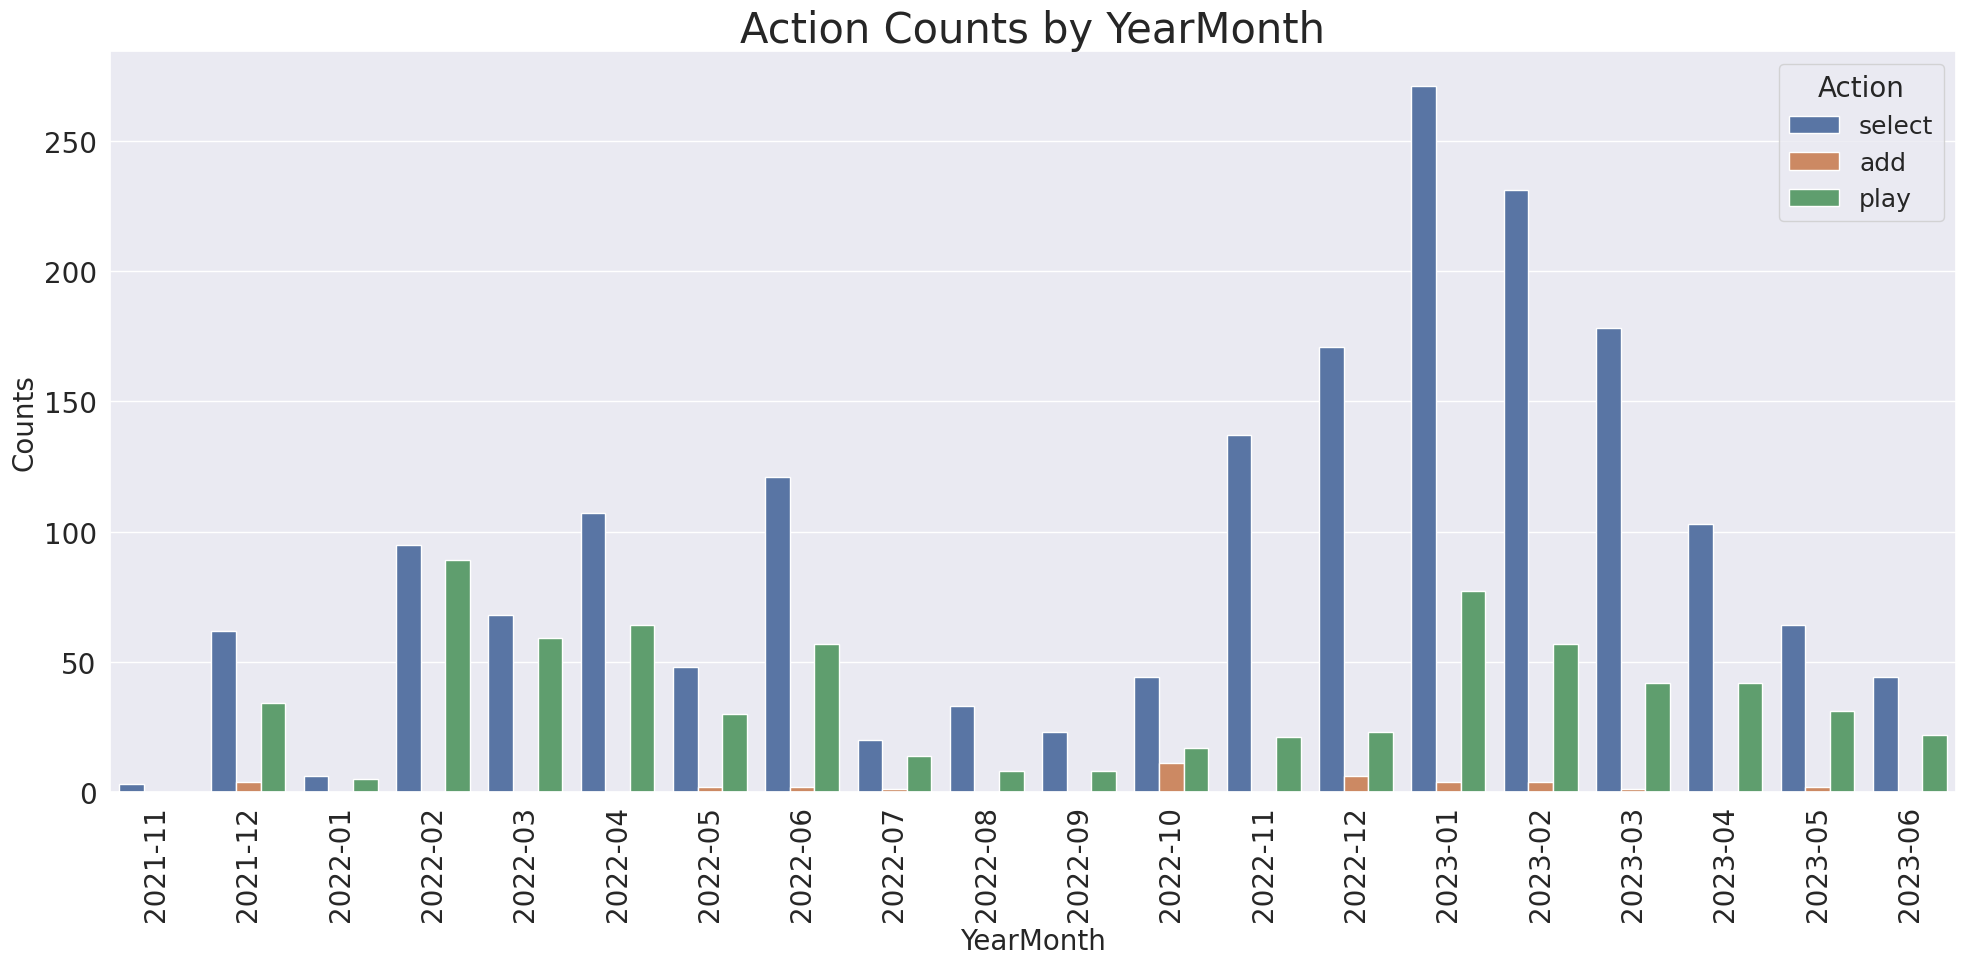

In [50]:
# Grouping the data by 'Country Iso Code' and 'Action', then counting the occurrences
grouped_data = df.groupby(['YearMonth', 'Action']).size().reset_index(name='Counts')

# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=grouped_data, x='YearMonth', y='Counts', hue='Action')

plt.title('Action Counts by YearMonth', fontsize=30)
plt.xlabel('YearMonth', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20, rotation=90)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

# Increasing the legend font size
plt.legend(title='Action', fontsize='18', title_fontsize='20')

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

In [51]:
# Convert 'Utc Timestamp' to datetime and format to 'Year-Month'
df['Hour'] = pd.to_datetime(df['Utc Timestamp']).dt.strftime('%H')

# Now your df has a new column 'YearMonth' with just the year and month from 'Utc Timestamp'
df.head()

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp,YearMonth,Hour
0,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19,2022-08,13
1,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:18,2022-08,13
2,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07,2022-08,13
3,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:03,2022-08,13
4,User 4,AE,Device 0,0,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23,2022-07,13


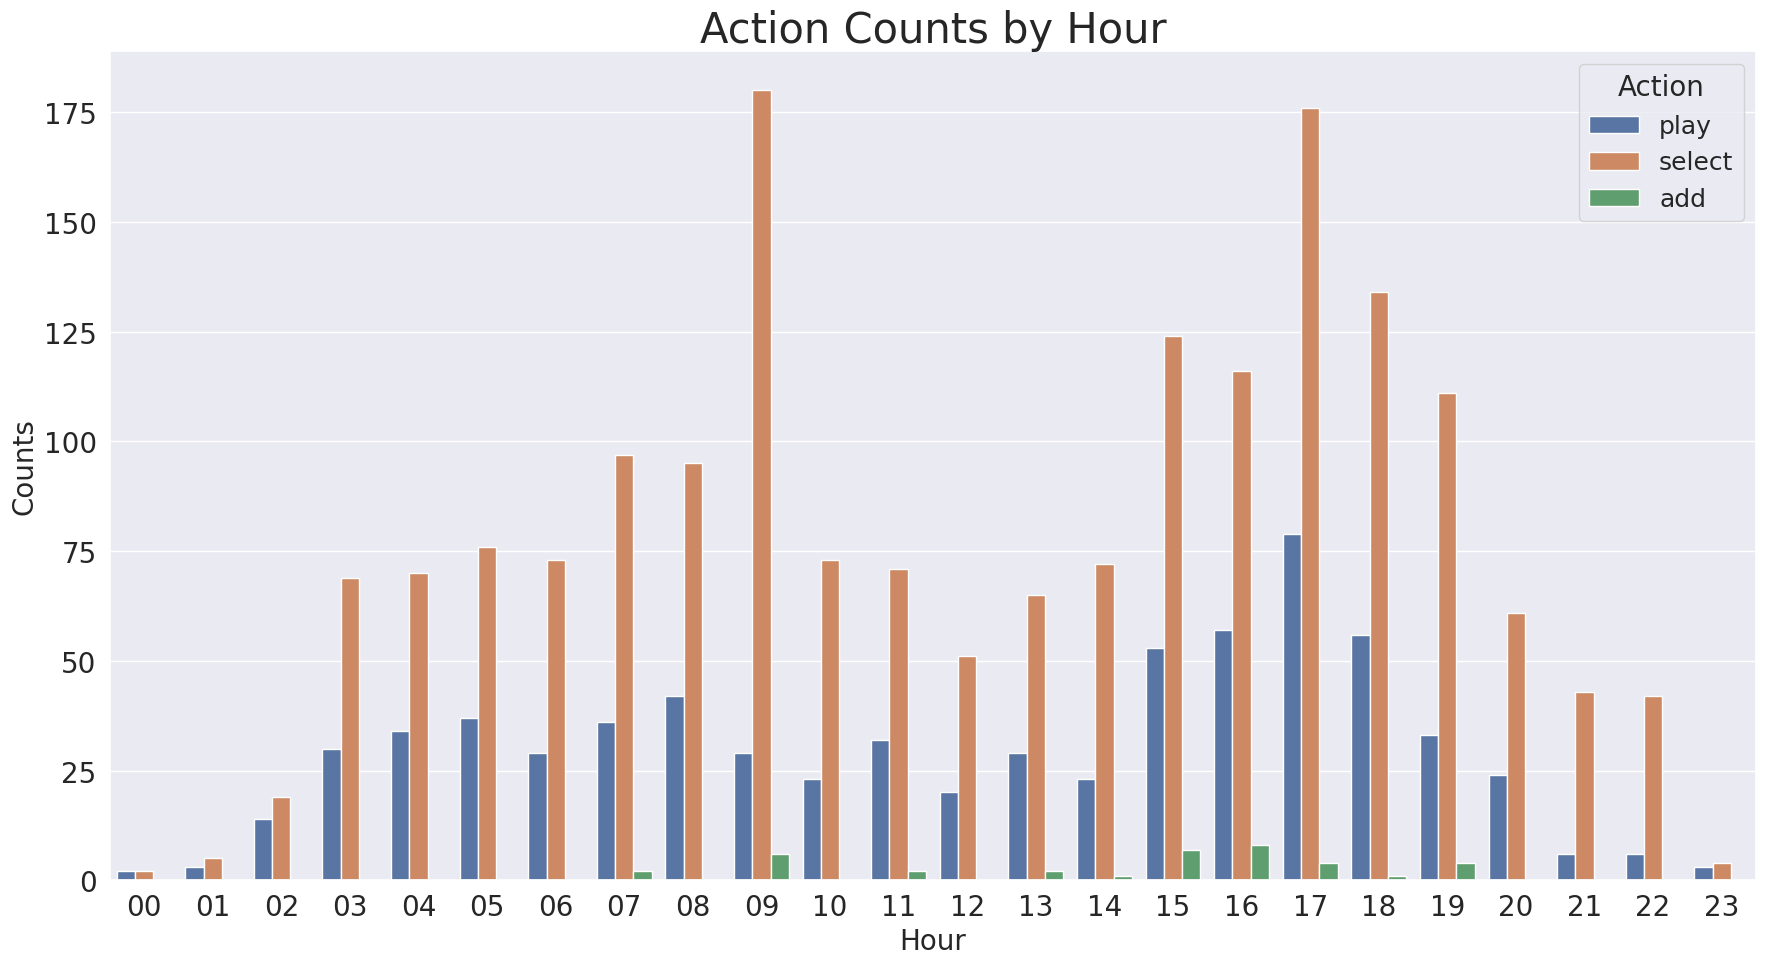

In [52]:
# Grouping the data by 'Country Iso Code' and 'Action', then counting the occurrences
grouped_data = df.groupby(['Hour', 'Action']).size().reset_index(name='Counts')

# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(18, 10))
sns.barplot(data=grouped_data, x='Hour', y='Counts', hue='Action')

plt.title('Action Counts by Hour', fontsize=30)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(fontsize=20, rotation=0)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

# Increasing the legend font size
plt.legend(title='Action', fontsize='18', title_fontsize='20')

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

In [53]:
# Now, group by 'Hour' and get the value counts of column 'a'
value_counts_by_hour = df.groupby('Hour')['Action'].value_counts().to_frame()
value_counts_by_hour

count
Hour Action       
00   play        2
     select      2
01   select      5
     play        3
02   select     19
     play       14
03   select     69
     play       30
04   select     70
     play       34
05   select     76
     play       37
06   select     73
     play       29
07   select     97
     play       36
     add         2
08   select     95
     play       42
09   select    180
     play       29
     add         6
10   select     73
     play       23
11   select     71
     play       32
     add         2
12   select     51
     play       20
13   select     65
     play       29
     add         2
14   select     72
     play       23
     add         1
15   select    124
     play       53
     add         7
16   select    116
     play       57
     add         8
17   select    176
     play       79
     add         4
18   select    134
     play       56
     add         1
19   select    111
     play       33
     add         4
20   select     61
     play       24
21   select     43
     play        6
22   select     42
     play        6
23   select      4
     play        3

In [54]:
# Pivot the DataFrame to have 'Action' as columns
pivot_table = value_counts_by_hour.unstack('Action')
pivot_table

count             
Action   add  play select
Hour                     
00       NaN   2.0    2.0
01       NaN   3.0    5.0
02       NaN  14.0   19.0
03       NaN  30.0   69.0
04       NaN  34.0   70.0
05       NaN  37.0   76.0
06       NaN  29.0   73.0
07       2.0  36.0   97.0
08       NaN  42.0   95.0
09       6.0  29.0  180.0
10       NaN  23.0   73.0
11       2.0  32.0   71.0
12       NaN  20.0   51.0
13       2.0  29.0   65.0
14       1.0  23.0   72.0
15       7.0  53.0  124.0
16       8.0  57.0  116.0
17       4.0  79.0  176.0
18       1.0  56.0  134.0
19       4.0  33.0  111.0
20       NaN  24.0   61.0
21       NaN   6.0   43.0
22       NaN   6.0   42.0
23       NaN   3.0    4.0

In [55]:
pivot_table['total_actions'] = pivot_table.sum(axis=1)
pivot_table

count              total_actions
Action   add  play select              
Hour                                   
00       NaN   2.0    2.0           4.0
01       NaN   3.0    5.0           8.0
02       NaN  14.0   19.0          33.0
03       NaN  30.0   69.0          99.0
04       NaN  34.0   70.0         104.0
05       NaN  37.0   76.0         113.0
06       NaN  29.0   73.0         102.0
07       2.0  36.0   97.0         135.0
08       NaN  42.0   95.0         137.0
09       6.0  29.0  180.0         215.0
10       NaN  23.0   73.0          96.0
11       2.0  32.0   71.0         105.0
12       NaN  20.0   51.0          71.0
13       2.0  29.0   65.0          96.0
14       1.0  23.0   72.0          96.0
15       7.0  53.0  124.0         184.0
16       8.0  57.0  116.0         181.0
17       4.0  79.0  176.0         259.0
18       1.0  56.0  134.0         191.0
19       4.0  33.0  111.0         148.0
20       NaN  24.0   61.0          85.0
21       NaN   6.0   43.0          49.0
22       NaN   6.0   42.0          48.0
23       NaN   3.0    4.0           7.0

In [56]:
# Calculate the ratio of 'play' to the total actions
pivot_table['play_total_ratio'] = pivot_table[('count', 'play')] / pivot_table['total_actions']

# Now you can remove the 'total_actions' if it was just an intermediate step
pivot_table.drop('total_actions', axis=1, inplace=True)

pivot_table

count              play_total_ratio
Action   add  play select                 
Hour                                      
00       NaN   2.0    2.0         0.500000
01       NaN   3.0    5.0         0.375000
02       NaN  14.0   19.0         0.424242
03       NaN  30.0   69.0         0.303030
04       NaN  34.0   70.0         0.326923
05       NaN  37.0   76.0         0.327434
06       NaN  29.0   73.0         0.284314
07       2.0  36.0   97.0         0.266667
08       NaN  42.0   95.0         0.306569
09       6.0  29.0  180.0         0.134884
10       NaN  23.0   73.0         0.239583
11       2.0  32.0   71.0         0.304762
12       NaN  20.0   51.0         0.281690
13       2.0  29.0   65.0         0.302083
14       1.0  23.0   72.0         0.239583
15       7.0  53.0  124.0         0.288043
16       8.0  57.0  116.0         0.314917
17       4.0  79.0  176.0         0.305019
18       1.0  56.0  134.0         0.293194
19       4.0  33.0  111.0         0.222973
20       NaN  24.0   61.0         0.282353
21       NaN   6.0   43.0         0.122449
22       NaN   6.0   42.0         0.125000
23       NaN   3.0    4.0         0.428571

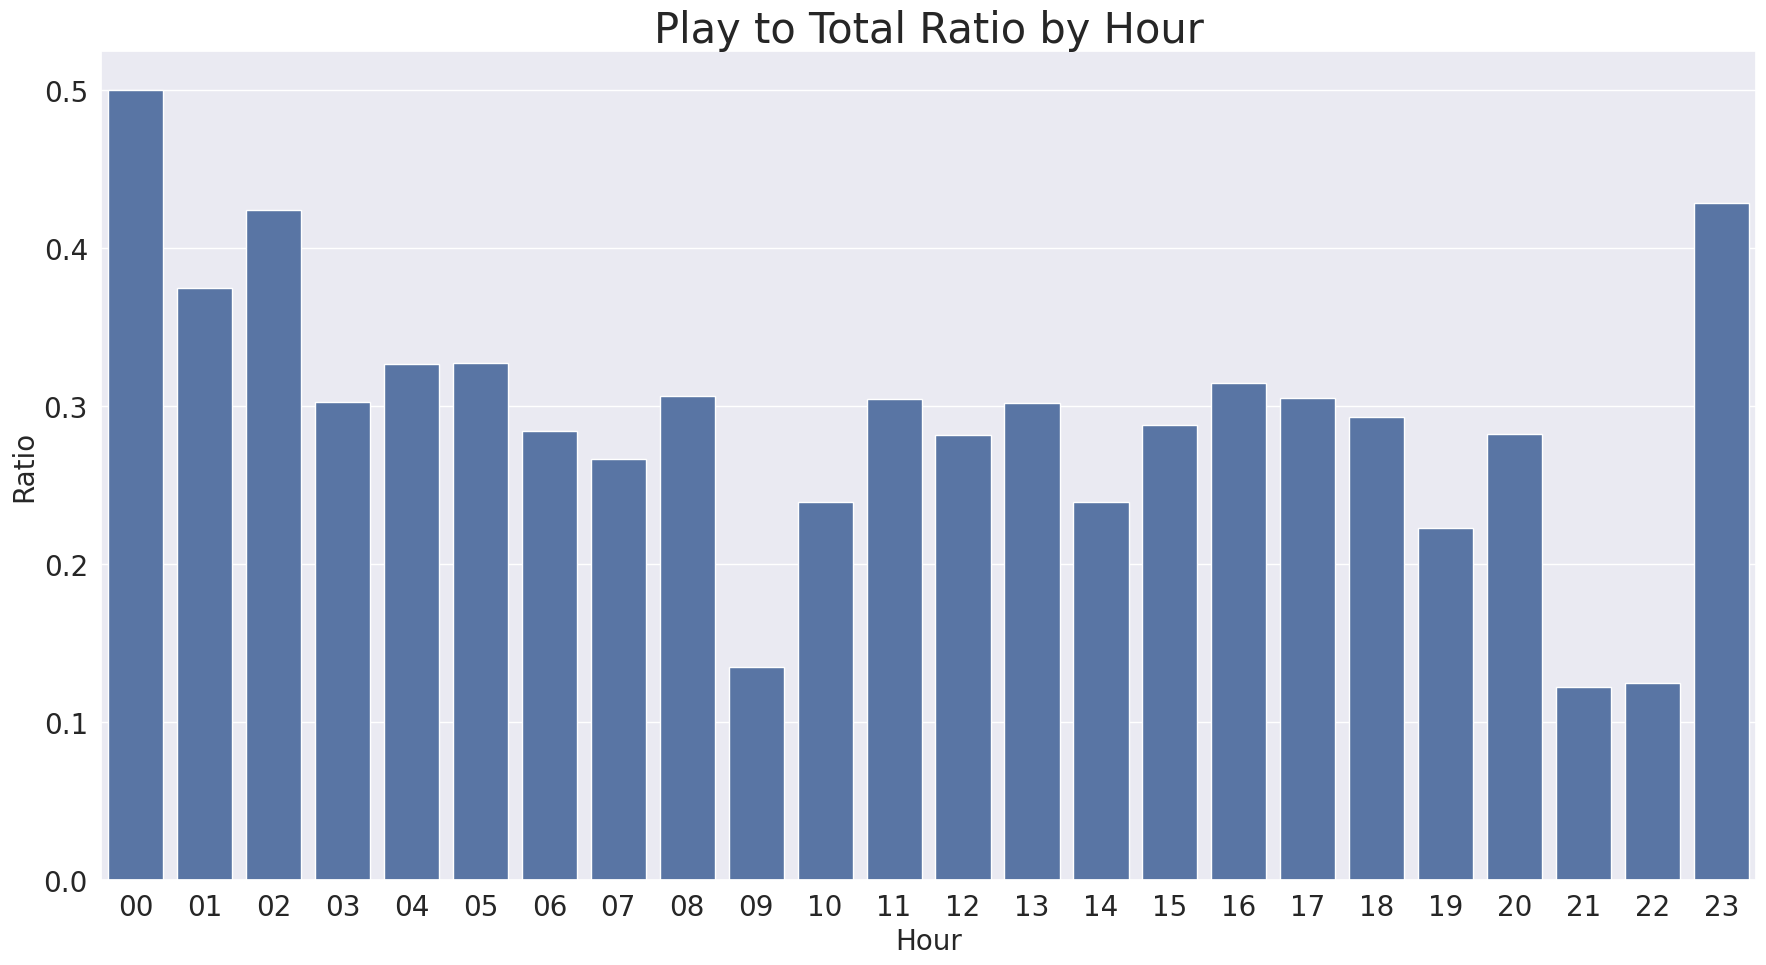

In [57]:
# Set the font scale of seaborn for all text elements
sns.set(font_scale=1.5)  # Use a larger scale for bigger text

# Plotting
plt.figure(figsize=(18, 10))
sns.barplot(data=pivot_table, x='Hour', y='play_total_ratio')

plt.title('Play to Total Ratio by Hour', fontsize=30)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Ratio', fontsize=20)
plt.xticks(fontsize=20, rotation=0)  # Set the fontsize of x-tick labels
plt.yticks(fontsize=20)  # Set the fontsize of y-tick labels

plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()